# In this notebook we'll project the syllable dataset into UMAP space
This notebook is contingent on the previous two. 

### Load the dataframe

In [2]:
import pandas as pd
from avgn.utils.paths import DATA_DIR

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [5]:
syllable_df = pd.read_pickle(DATA_DIR / 'example_bengalese_finch_dataset.pickle')
syllable_df[:3]

start_time  end_time labels  sequence_num   indv  indvi        key   rate  \
0       1.158     1.239      0             0  Bird8      0  Bird8_108  32000   
1       1.323     1.411      0             0  Bird8      0  Bird8_108  32000   
2       1.430     1.533      1             0  Bird8      0  Bird8_108  32000   

                                         spectrogram  
0  [[0, 0, 0, 0, 0, 0, 0, 0, 8, 10, 45, 84, 67, 3...  
1  [[0, 0, 0, 0, 0, 0, 0, 10, 10, 10, 9, 11, 25, ...  
2  [[0, 0, 0, 0, 0, 0, 0, 8, 8, 8, 8, 8, 8, 8, 8,...

### First, lets look at the datasets of syllables for each animal

In [12]:
from avgn.visualization.spectrogram import draw_spec_set
import numpy as np
import matplotlib.pyplot as plt

Bird1 35728


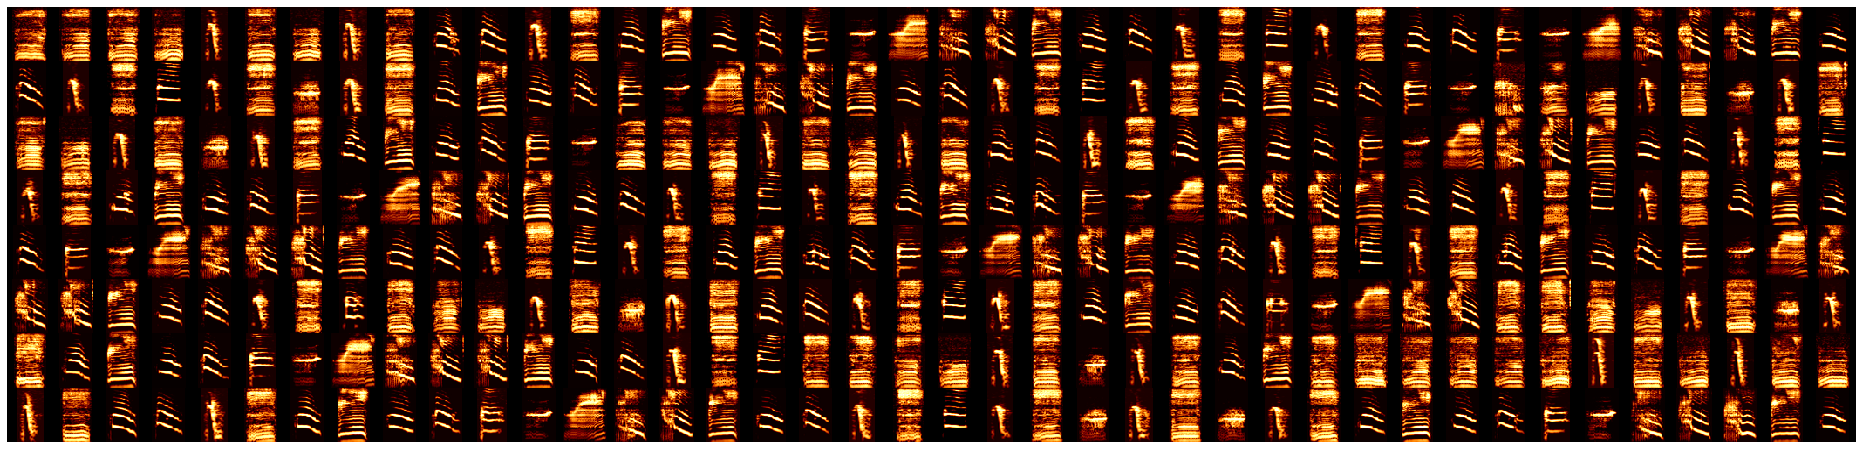

Bird3 29470


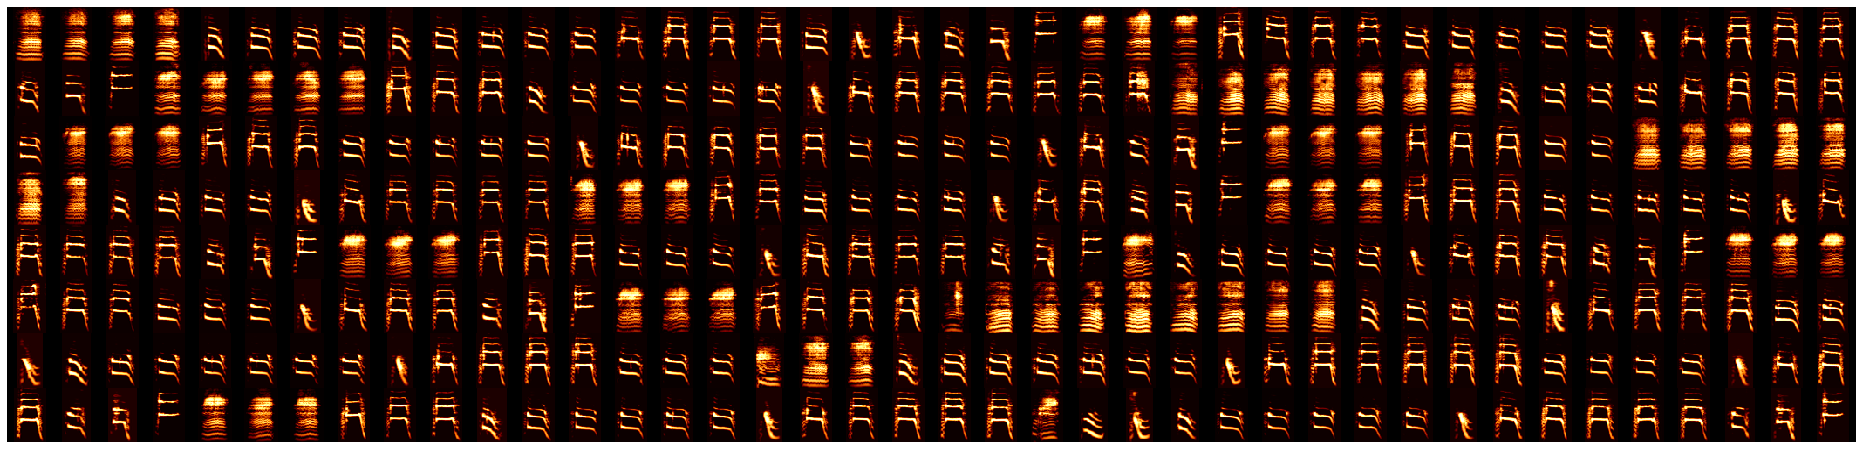

Bird8 4985


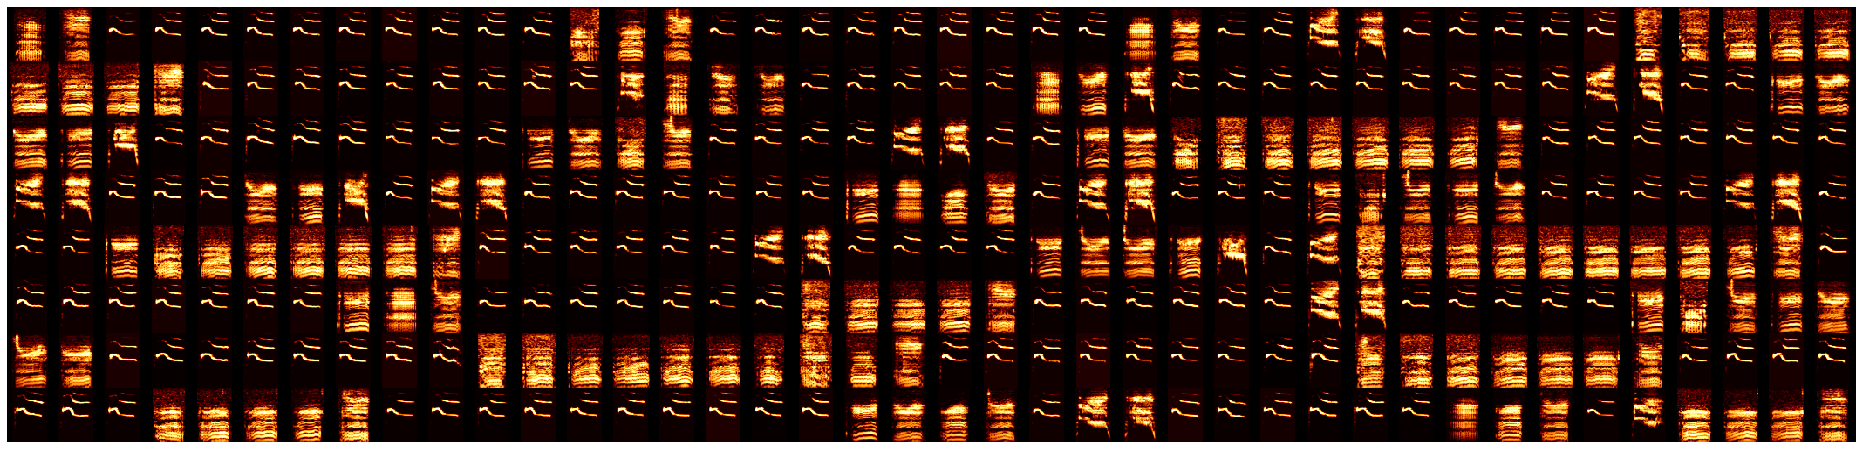

In [14]:
for indv in np.sort(syllable_df.indv.unique()[:3]):
    print(indv, np.sum(syllable_df.indv == indv))
    specs = np.array([i/np.max(i) for i in syllable_df[syllable_df.indv == indv].spectrogram.values])
    specs[specs<0] = 0
    draw_spec_set(specs, zoom=1,
                  maxrows=8, 
                  colsize=40)
    plt.show()

### Project syllables
Here, we're creating a projection for each individual. You could also, for example, project all the individuals together. 


**note** if you have CUDA installed, it will be faster to project with `cuml.manifold.umap`

In [18]:
from avgn.signalprocessing.create_spectrogram_dataset import flatten_spectrograms
from avgn.visualization.projections import scatter_spec
import umap

Bird0 7652
UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=0.25, verbose=True)
Construct fuzzy simplicial set
Thu Nov 19 11:12:54 2020 Finding Nearest Neighbors
Thu Nov 19 11:12:54 2020 Building RP forest with 9 trees
Thu Nov 19 11:12:54 2020 parallel NN descent for 13 iterations
	 0  /  13
	 1  /  13
	 2  /  13
Thu Nov 19 11:12:55 2020 Finished Nearest Neighbor Search
Thu Nov 19 11:12:55 2020 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Thu Nov 19 11:13:14 2020 Finished embedding


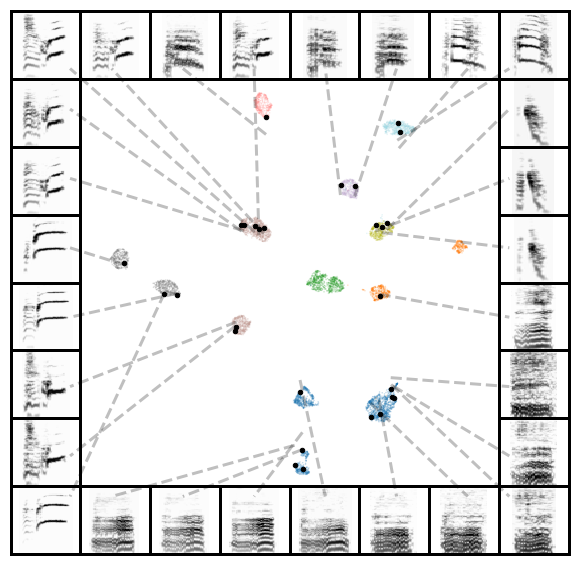

Bird1 35728
UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=0.25, verbose=True)
Construct fuzzy simplicial set
Thu Nov 19 11:13:16 2020 Finding Nearest Neighbors
Thu Nov 19 11:13:16 2020 Building RP forest with 14 trees
Thu Nov 19 11:13:18 2020 parallel NN descent for 15 iterations
	 0  /  15
	 1  /  15
	 2  /  15
	 3  /  15
Thu Nov 19 11:13:20 2020 Finished Nearest Neighbor Search
Thu Nov 19 11:13:20 2020 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Thu Nov 19 11:13:47 2020 Finished embedding


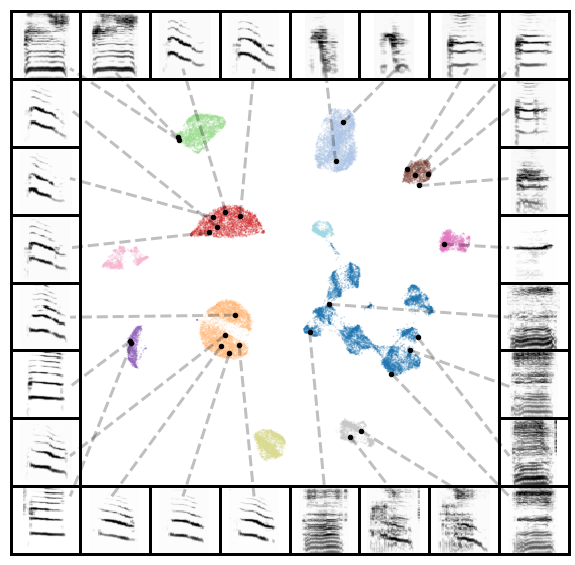

Bird10 5743
UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=0.25, verbose=True)
Construct fuzzy simplicial set
Thu Nov 19 11:13:50 2020 Finding Nearest Neighbors
Thu Nov 19 11:13:50 2020 Building RP forest with 9 trees
Thu Nov 19 11:13:50 2020 parallel NN descent for 12 iterations
	 0  /  12
	 1  /  12
	 2  /  12
Thu Nov 19 11:13:51 2020 Finished Nearest Neighbor Search
Thu Nov 19 11:13:51 2020 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Thu Nov 19 11:14:01 2020 Finished embedding


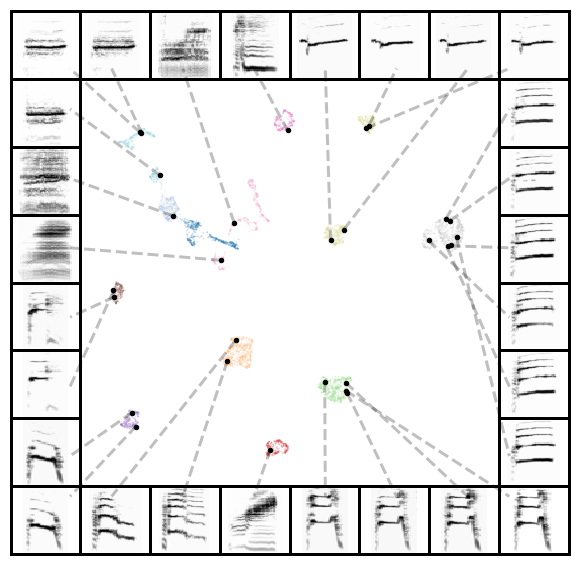

Bird2 26127
UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=0.25, verbose=True)
Construct fuzzy simplicial set
Thu Nov 19 11:14:03 2020 Finding Nearest Neighbors
Thu Nov 19 11:14:03 2020 Building RP forest with 13 trees
Thu Nov 19 11:14:04 2020 parallel NN descent for 15 iterations
	 0  /  15
	 1  /  15
	 2  /  15
	 3  /  15
Thu Nov 19 11:14:05 2020 Finished Nearest Neighbor Search
Thu Nov 19 11:14:05 2020 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Thu Nov 19 11:14:21 2020 Finished embedding


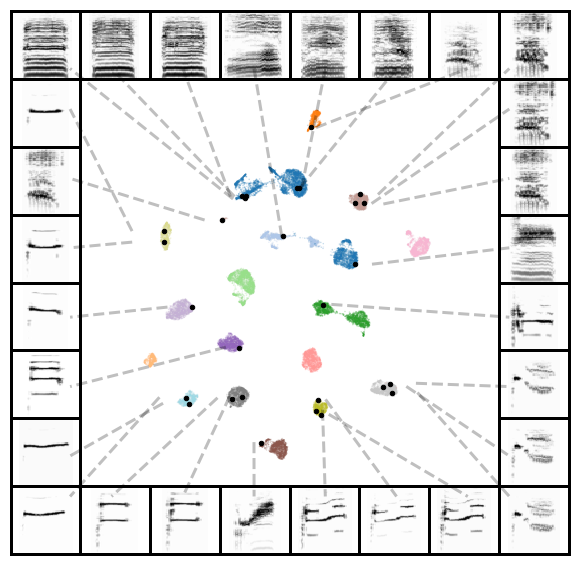

Bird3 29470
UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=0.25, verbose=True)
Construct fuzzy simplicial set
Thu Nov 19 11:14:24 2020 Finding Nearest Neighbors
Thu Nov 19 11:14:24 2020 Building RP forest with 14 trees
Thu Nov 19 11:14:25 2020 parallel NN descent for 15 iterations
	 0  /  15
	 1  /  15
	 2  /  15
	 3  /  15
Thu Nov 19 11:14:27 2020 Finished Nearest Neighbor Search
Thu Nov 19 11:14:27 2020 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Thu Nov 19 11:14:55 2020 Finished embedding


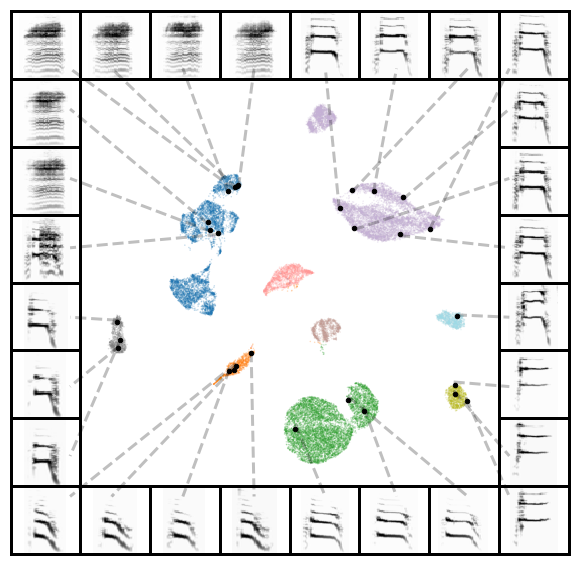

Bird4 26891
UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=0.25, verbose=True)
Construct fuzzy simplicial set
Thu Nov 19 11:14:59 2020 Finding Nearest Neighbors
Thu Nov 19 11:14:59 2020 Building RP forest with 13 trees
Thu Nov 19 11:15:00 2020 parallel NN descent for 15 iterations
	 0  /  15
	 1  /  15
	 2  /  15
	 3  /  15
Thu Nov 19 11:15:01 2020 Finished Nearest Neighbor Search
Thu Nov 19 11:15:01 2020 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Thu Nov 19 11:15:18 2020 Finished embedding


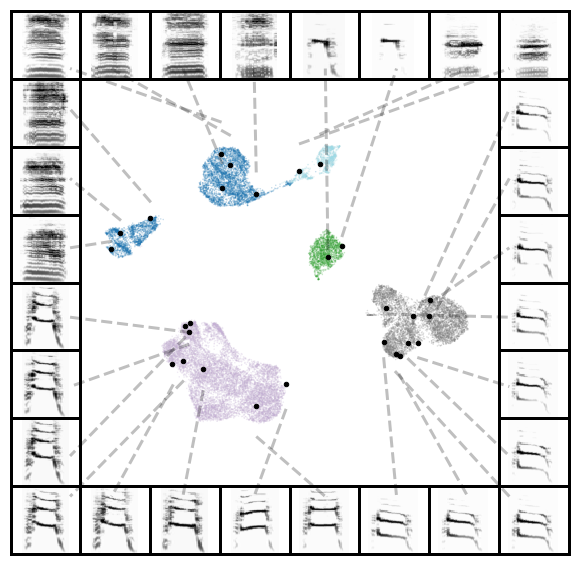

Bird5 20457
UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=0.25, verbose=True)
Construct fuzzy simplicial set
Thu Nov 19 11:15:21 2020 Finding Nearest Neighbors
Thu Nov 19 11:15:21 2020 Building RP forest with 12 trees
Thu Nov 19 11:15:22 2020 parallel NN descent for 14 iterations
	 0  /  14
	 1  /  14
	 2  /  14
	 3  /  14
Thu Nov 19 11:15:23 2020 Finished Nearest Neighbor Search
Thu Nov 19 11:15:23 2020 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Thu Nov 19 11:15:42 2020 Finished embedding


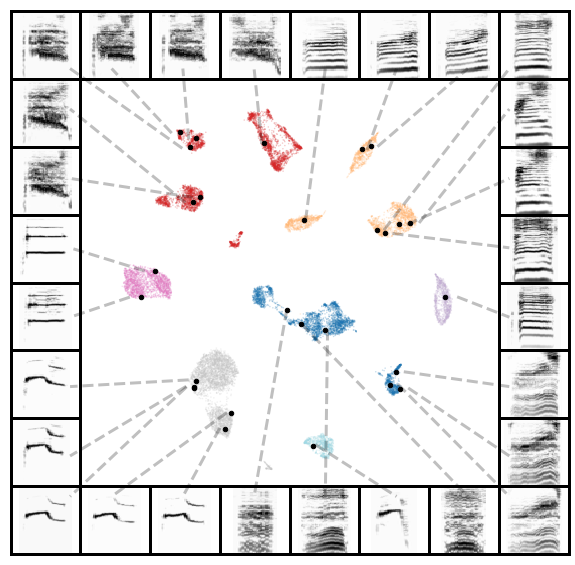

Bird6 17653
UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=0.25, verbose=True)
Construct fuzzy simplicial set
Thu Nov 19 11:15:45 2020 Finding Nearest Neighbors
Thu Nov 19 11:15:45 2020 Building RP forest with 12 trees
Thu Nov 19 11:15:45 2020 parallel NN descent for 14 iterations
	 0  /  14
	 1  /  14
	 2  /  14
	 3  /  14
Thu Nov 19 11:15:47 2020 Finished Nearest Neighbor Search
Thu Nov 19 11:15:47 2020 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Thu Nov 19 11:15:58 2020 Finished embedding


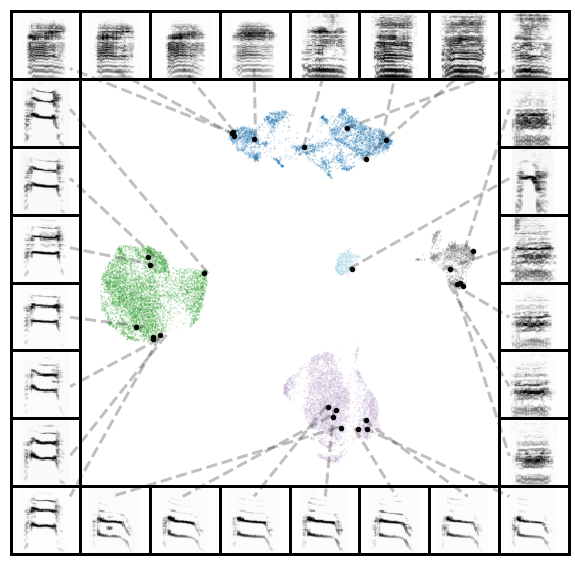

Bird7 20722
UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=0.25, verbose=True)
Construct fuzzy simplicial set
Thu Nov 19 11:16:01 2020 Finding Nearest Neighbors
Thu Nov 19 11:16:01 2020 Building RP forest with 12 trees
Thu Nov 19 11:16:01 2020 parallel NN descent for 14 iterations
	 0  /  14
	 1  /  14
	 2  /  14
	 3  /  14
Thu Nov 19 11:16:03 2020 Finished Nearest Neighbor Search
Thu Nov 19 11:16:03 2020 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Thu Nov 19 11:16:24 2020 Finished embedding


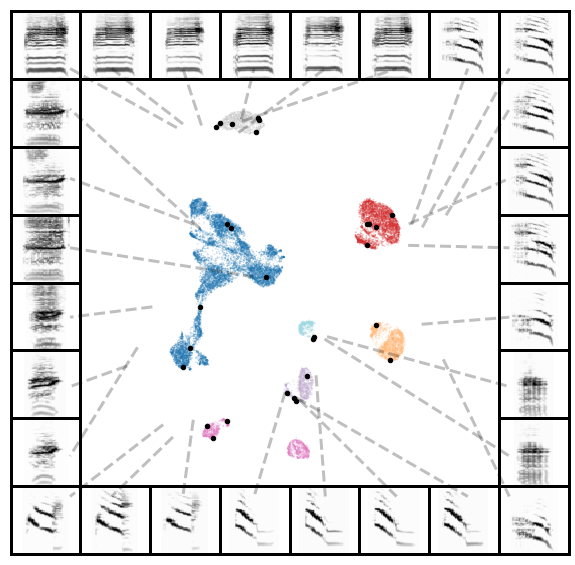

Bird8 4985
UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=0.25, verbose=True)
Construct fuzzy simplicial set
Thu Nov 19 11:16:26 2020 Finding Nearest Neighbors
Thu Nov 19 11:16:26 2020 Building RP forest with 9 trees
Thu Nov 19 11:16:26 2020 parallel NN descent for 12 iterations
	 0  /  12
	 1  /  12
	 2  /  12
	 3  /  12
Thu Nov 19 11:16:27 2020 Finished Nearest Neighbor Search
Thu Nov 19 11:16:27 2020 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Thu Nov 19 11:16:36 2020 Finished embedding


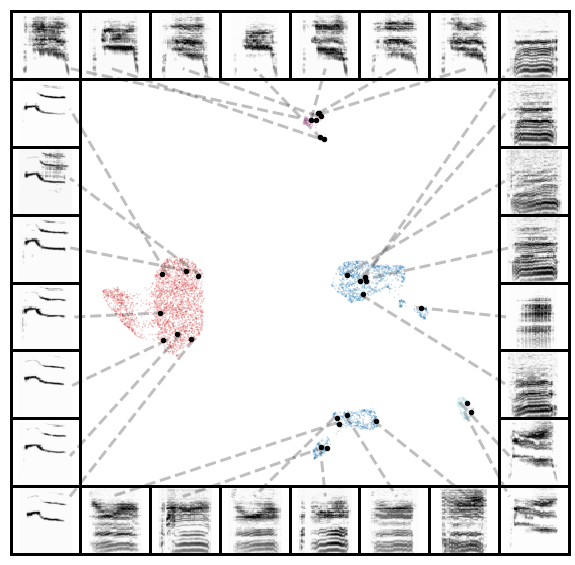

Bird9 19541
UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=0.25, verbose=True)
Construct fuzzy simplicial set
Thu Nov 19 11:16:38 2020 Finding Nearest Neighbors
Thu Nov 19 11:16:38 2020 Building RP forest with 12 trees
Thu Nov 19 11:16:38 2020 parallel NN descent for 14 iterations
	 0  /  14
	 1  /  14
	 2  /  14
	 3  /  14
Thu Nov 19 11:16:39 2020 Finished Nearest Neighbor Search
Thu Nov 19 11:16:40 2020 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Thu Nov 19 11:16:52 2020 Finished embedding


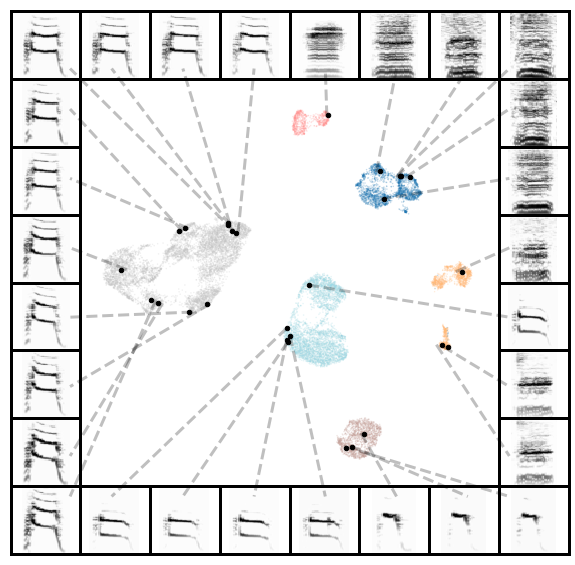

In [20]:
for indv in np.sort(syllable_df.indv.unique()[:3]):

    print(indv, np.sum(syllable_df.indv == indv))
    specs = np.array(
        [
            i / np.max(i)
            for i in syllable_df[syllable_df.indv == indv].spectrogram.values
        ]
    )
    # flatten the spectrograms into 1D
    specs_flattened = flatten_spectrograms(specs)
    
    # project (you can choose different UMAP parameters here)
    fit = umap.UMAP(min_dist=0.25, verbose=True)
    z = list(fit.fit_transform(specs_flattened))
    
    # create a scatterplot of the projections
    scatter_spec(
        np.vstack(z),
        specs,
        column_size=8,
        pal_color="tab20",
        color_points=False,
        enlarge_points=20,
        figsize=(10, 10),
        scatter_kwargs = {
            'labels': list(syllable_df[syllable_df.indv == indv]['labels'].values),
            'alpha': 0.25,
            's': 0.25,
            'show_legend': False
        },
        matshow_kwargs = {
            'cmap': plt.cm.Greys
        },
        line_kwargs = {
            'lw':3,
            'ls':"dashed",
            'alpha':0.25,
        },
        draw_lines=True,
        n_subset= 1000,
        border_line_width = 3,
    );
    plt.show()


### (Optional) Cluster UMAP into HDBSCAN labels

In [19]:
import hdbscan

In [21]:
for indv in np.sort(syllable_df.indv.unique()[:3]):

    print(indv, np.sum(syllable_df.indv == indv))
    specs = np.array(
        [
            i / np.max(i)
            for i in syllable_df[syllable_df.indv == indv].spectrogram.values
        ]
    )
    # flatten the spectrograms into 1D
    specs_flattened = flatten_spectrograms(specs)
    
    # project (you can choose different UMAP parameters here)
    fit = umap.UMAP(min_dist=0.25, verbose=True)
    z = list(fit.fit_transform(specs_flattened))
    
    # cluster
    clusterer = hdbscan.HDBSCAN(
            # min_cluster_size should be the smallest size we would expect a cluster to be
            min_cluster_size=int(len(z) * 0.01), 
        ).fit(z)
    
    # create a scatterplot of the projections
    scatter_spec(
        np.vstack(z),
        specs,
        column_size=8,
        pal_color="tab20",
        color_points=False,
        enlarge_points=20,
        figsize=(10, 10),
        scatter_kwargs = {
            'labels': list(clusterer.labels_),
            'alpha': 0.25,
            's': 0.25,
            'show_legend': False
        },
        matshow_kwargs = {
            'cmap': plt.cm.Greys
        },
        line_kwargs = {
            'lw':3,
            'ls':"dashed",
            'alpha':0.25,
        },
        draw_lines=True,
        n_subset= 1000,
        border_line_width = 3,
    );
    plt.show()


Bird1 35728
UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=0.25, verbose=True)
Construct fuzzy simplicial set
Thu Nov 19 11:48:25 2020 Finding Nearest Neighbors
Thu Nov 19 11:48:25 2020 Building RP forest with 14 trees
Thu Nov 19 11:48:26 2020 parallel NN descent for 15 iterations
	 0  /  15
	 1  /  15
	 2  /  15
	 3  /  15
Thu Nov 19 11:48:28 2020 Finished Nearest Neighbor Search
Thu Nov 19 11:48:28 2020 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Thu Nov 19 11:48:49 2020 Finished embedding


NameError: name 'hdbscan' is not defined